# Rail Performance

In [1]:
%load_ext autoreload
%autoreload 2

%run relativepath.py
%run commonimports.py
%run displayoptions.py
%matplotlib inline

2019-04-17 21:17:48,025 Property "cache_dir" set to data


In [2]:
from IPython.display import HTML, display

## Load Rail Data

In [3]:
RAIL_DATASET_URL ='https://www150.statcan.gc.ca/n1/tbl/csv/23100274-eng.zip'
dataset = StatscanZip(RAIL_DATASET_URL)
rail_df = dataset.get_data()

2019-04-17 21:17:50,020 Reading file data\23100274.csv


In [4]:
rail_df.head()

,REF_DATE,GEO,Companies,Terminal dwell-time
0,2018-11-24,Canada,"Canadian National, System-wide",18.6
1,2018-11-24,Canada,"Canadian National, Edmonton terminal, Alberta",9.6
2,2018-11-24,Canada,"Canadian National, Vancouver terminal, British Columbia",22.8
3,2018-11-24,Canada,"Canadian National, Winnipeg terminal, Manitoba",13.5
4,2018-11-24,Canada,"Canadian National, MacMilllan yard, Ontario",18.8


In [5]:
dataset.get_metadata().cube_info.T

Cube Title,"Weekly rail terminal performance indicator, Transport Canada"
Product Id,23100274
CANSIM Id,NaN
URL,https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=2310027401
Cube Notes,1
Archive Status,CURRENT - a cube available to the public and that is current
Frequency,Weekly
Start Reference Period,2018-11-24
End Reference Period,2019-03-30
Total number of dimensions,3


## Extract Locations

In [6]:
location_columns = rail_df.Companies.str.extract(r'([^,]*), ([^,]*),? ?([^,]*)?',)
location_columns.columns = ['Company', 'Location','Province']

In [7]:
rail_data = pd.concat([rail_df, location_columns], axis=1).drop(columns=['GEO','Companies']).set_index('REF_DATE').dropna(subset=['Terminal dwell-time'])

In [8]:
rail_data.head(10)

,Terminal dwell-time,Company,Location,Province
REF_DATE,,,,
2018-11-24,18.6,Canadian National,System-wide,
2018-11-24,9.6,Canadian National,Edmonton terminal,Alberta
2018-11-24,22.8,Canadian National,Vancouver terminal,British Columbia
2018-11-24,13.5,Canadian National,Winnipeg terminal,Manitoba
2018-11-24,18.8,Canadian National,MacMilllan yard,Ontario
2018-11-24,6.8,Canadian National,Taschereau yard,Quebec
2018-11-24,22.2,Canadian National,Prince George yard,British Columbia
2018-11-24,17.8,Canadian National,Saskatoon yard,Saskatchewan
2018-11-24,20.7,Canadian National,Brampton intermodal,Ontario


## System Wide

In [9]:
rail_system_wide = rail_data.query("Location=='System-wide'").drop(columns='Province')

In [17]:
rail_system_wide.head(20)

,Terminal dwell-time,Company,Location
REF_DATE,,,
2018-11-24,18.6,Canadian National,System-wide
2018-11-24,15.9,Canadian Pacific,System-wide
2018-11-24,15.0,Burlington Northern Santa Fe,System-wide
2018-12-01,19.4,Canadian National,System-wide
2018-12-01,15.1,Canadian Pacific,System-wide
2018-12-01,17.2,Burlington Northern Santa Fe,System-wide
2018-12-08,19.7,Canadian National,System-wide
2018-12-08,16.9,Canadian Pacific,System-wide
2018-12-08,13.1,Burlington Northern Santa Fe,System-wide


## Canada Pacific

In [11]:
cp_system_wide = rail_system_wide.query("Company =='Canadian Pacific'")
cp_system_wide.head(4)

,Terminal dwell-time,Company,Location
REF_DATE,,,
2018-11-24,15.9,Canadian Pacific,System-wide
2018-12-01,15.1,Canadian Pacific,System-wide
2018-12-08,16.9,Canadian Pacific,System-wide
2018-12-15,16.4,Canadian Pacific,System-wide


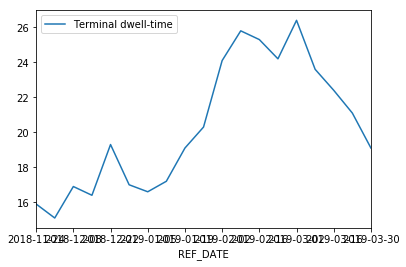

In [12]:
cp_system_wide.plot()

In [18]:
import hvplot.pandas
cp_system_wide[['Terminal dwell-time']].hvplot()

:Curve   [REF_DATE]   (Terminal dwell-time)

## By Company

In [ ]:
by_company = rail_system_wide.groupby('Company').max()

In [ ]:
by_company

In [ ]:
rail_data.index.dtype